## Actors and their descriptions

Top 10 actors (frequency) per ethnic category


In [104]:
import pandas as pd

columns_to_read = [
    "url",
    "title",
    "date",
    "views",
    "upvotes",
    "downvotes",
    "production",
    "comments",
    "actors",
]

df  = pd.read_csv('data/raw/porn-with-dates-2022.csv', usecols=columns_to_read)
df.columns

Index(['url', 'title', 'date', 'views', 'upvotes', 'downvotes', 'production',
       'comments', 'actors'],
      dtype='object')

In [127]:
actors = df['actors'].dropna().str.split(',').explode()
# Count the occurrences of each actor
actor_counts = actors.value_counts()

In [86]:
actor_counts

actors
James Deen        654
Manuel Ferrara    573
Johnny Sins       472
Asa Akira         442
Lex Steele        421
                 ... 
Tiffany Tease       1
Adele Stephens      1
Sydney Moon         1
Leticia Cline       1
Elise Rider         1
Name: count, Length: 9161, dtype: int64

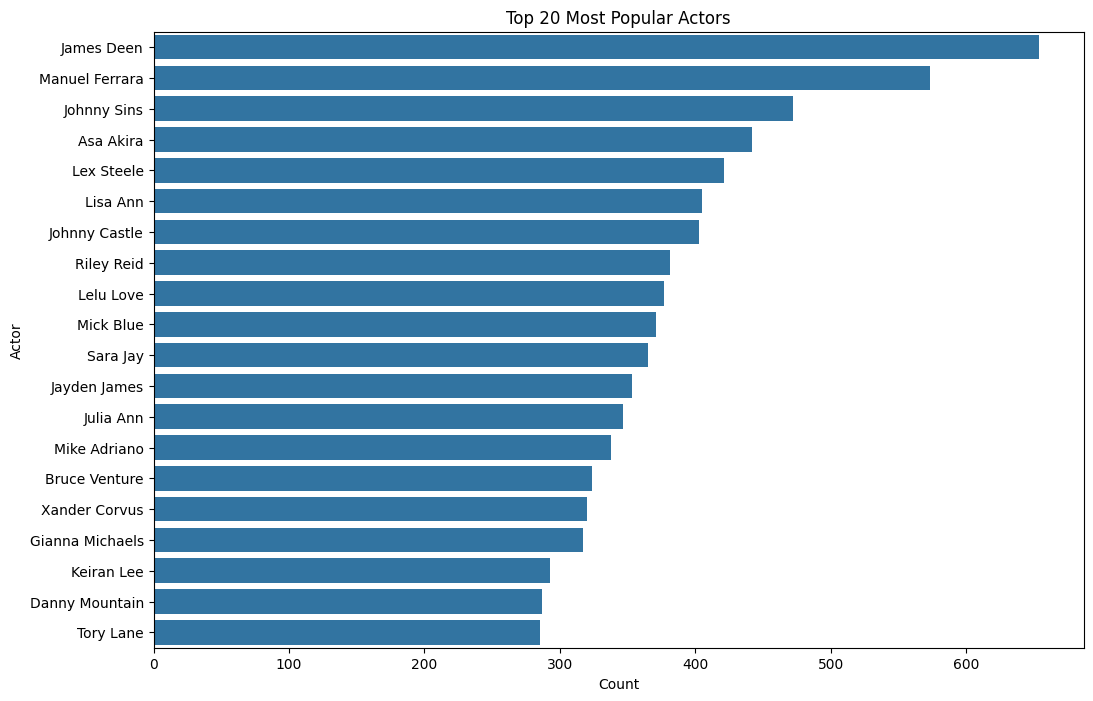

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

actor_counts_df = actor_counts.reset_index()
actor_counts_df.columns = ['actor', 'count']
top_actors = actor_counts_df.head(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='actor', data=top_actors)
plt.title('Top 20 Most Popular Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

In [108]:
actor_counts.to_csv('data/processed/actor_counts.csv')

In [ ]:
import re

# Define patterns for physical descriptions
hair_color_pattern = r'\b(blonde|brunette|redhead|black-haired|brown-haired|gray-haired|bald)\b'
skin_color_pattern = r'\b(white|black|asian|hispanic|latino|brown|dark-skinned|light-skinned|pale)\b'
ethnicity_pattern = r'\b(white|black|asian|hispanic|latino|caucasian|african|indian|native american|arabic|middle eastern|european)\b'

# Function to extract physical descriptions from a title
def extract_descriptions(title):
    hair_color = re.findall(hair_color_pattern, title)
    skin_color = re.findall(skin_color_pattern, title)
    ethnicity = re.findall(ethnicity_pattern, title)
    return hair_color, skin_color, ethnicity

# Apply the function to the 'title' column
df['hair_color'], df['skin_color'], df['ethnicity'] = zip(*df['title'].apply(extract_descriptions))

# Ensure skin color and ethnicity values are in lowercase
df['skin_color'] = df['skin_color'].apply(lambda x: [color.lower() for color in x] if isinstance(x, list) else x)
df['ethnicity'] = df['ethnicity'].apply(lambda x: [eth.lower() for eth in x] if isinstance(x, list) else x)



In [113]:
df.ethnicity.dropna().explode().value_counts()  

ethnicity
black              7340
asian              4311
white              2849
indian              712
european            360
african             162
latino               43
arabic               20
hispanic             10
middle eastern        7
native american       5
caucasian             5
Name: count, dtype: int64

In [114]:
df.skin_color.dropna().explode().value_counts()  

skin_color
black       7340
asian       4311
white       2849
brown        189
pale         121
latino        43
hispanic      10
Name: count, dtype: int64

In [115]:
df.hair_color.dropna().explode().value_counts()  

hair_color
blonde          10710
brunette         5719
redhead          2186
bald               78
black-haired        7
brown-haired        2
Name: count, dtype: int64

In [96]:
# visualise skin colour distributions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




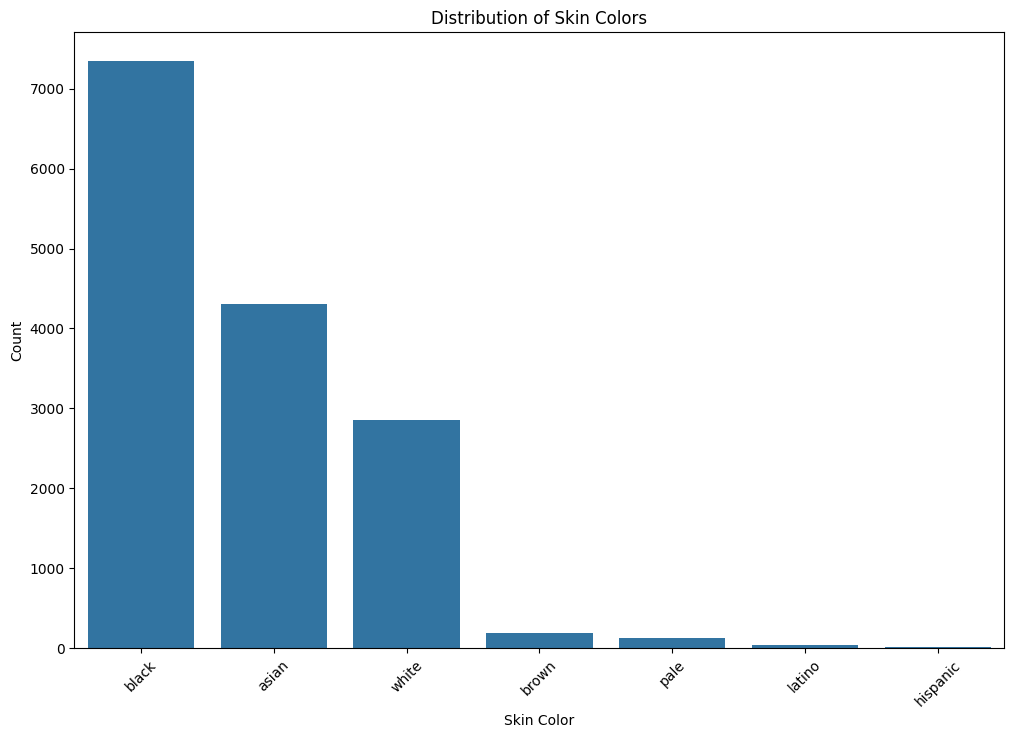

In [116]:
skin_color_df = df.explode('skin_color').dropna(subset=['skin_color'])

# Create a bar plot to visualize the skin color distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=skin_color_df, x='skin_color', order=skin_color_df['skin_color'].value_counts().index)
plt.title('Distribution of Skin Colors')
plt.xlabel('Skin Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

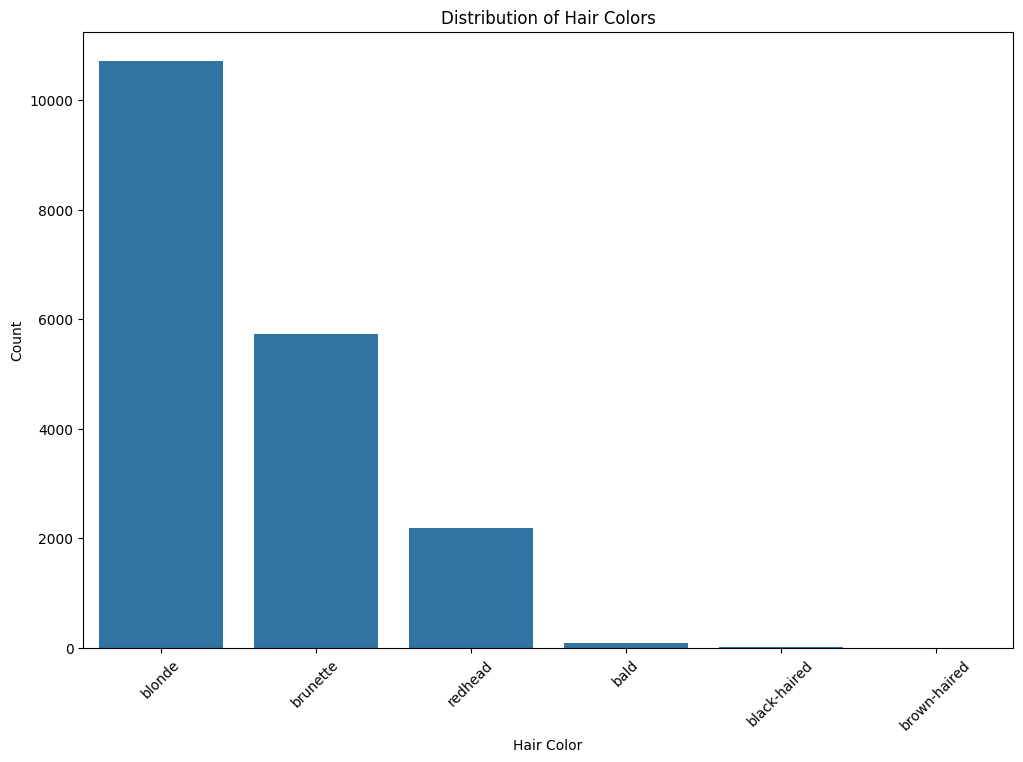

In [117]:
# Visualize the hair color distribution
# Explode the lists in the 'hair_color' column
hair_color_df = df.explode('hair_color').dropna(subset=['hair_color'])

# Create a bar plot to visualize the hair color distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=hair_color_df, x='hair_color', order=hair_color_df['hair_color'].value_counts().index)
plt.title('Distribution of Hair Colors')
plt.xlabel('Hair Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

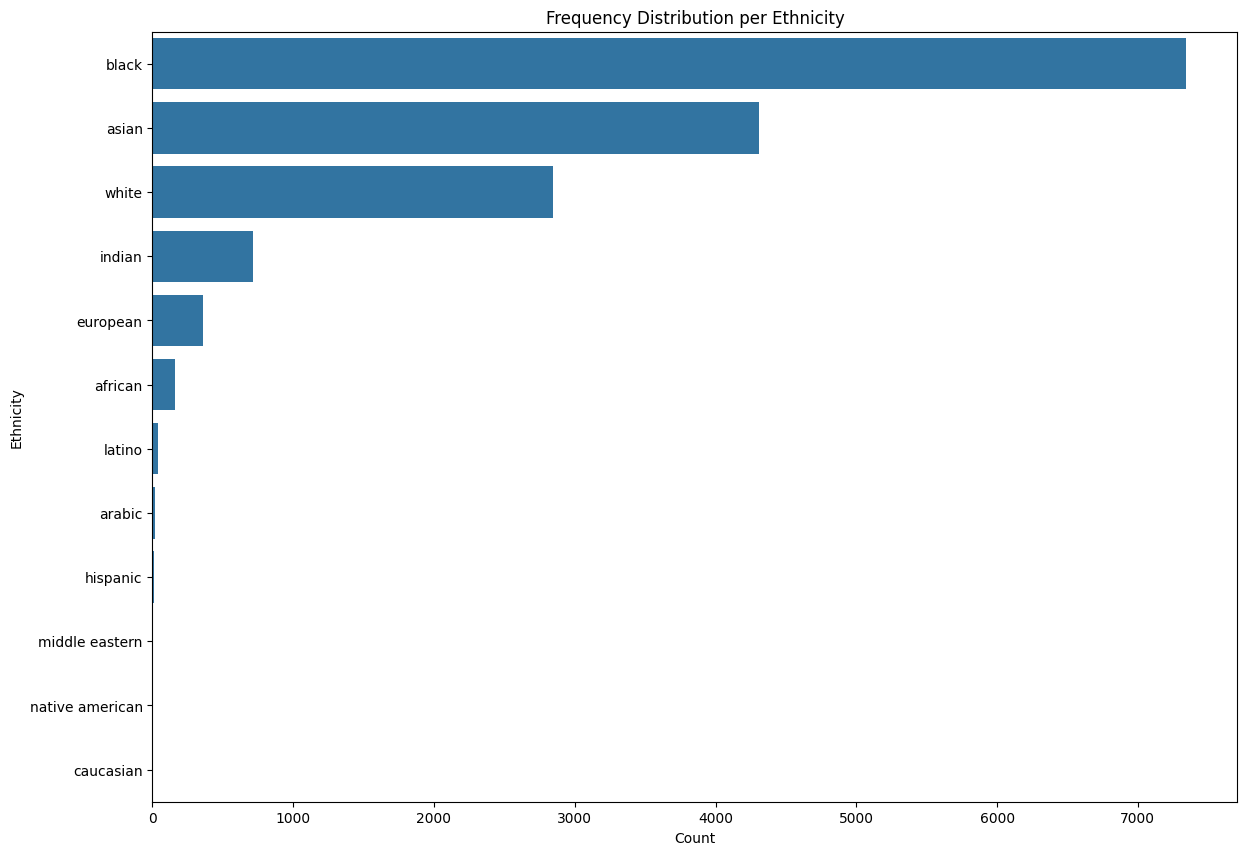

In [119]:
# Explode the lists in the 'ethnicity' column
ethnicity_df = df.explode('ethnicity').dropna(subset=['ethnicity'])

# Calculate the frequency distribution per ethnicity
ethnicity_counts = ethnicity_df['ethnicity'].value_counts()

# Create a bar plot to visualize the frequency distribution per ethnicity
plt.figure(figsize=(14, 10))
sns.barplot(x=ethnicity_counts.values, y=ethnicity_counts.index)
plt.title('Frequency Distribution per Ethnicity')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()

In [122]:
# Select the desired columns
selected_columns = df[['actors', 'skin_color', 'hair_color', 'ethnicity']]
# Save the selected columns to a new CSV file
selected_columns.to_csv('data/processed/actor_descriptions_filtered.csv', index=False)

In [124]:
# Extract the year from the date column (assuming the date column is named 'date')
df['year'] = pd.to_datetime(df['date']).dt.year


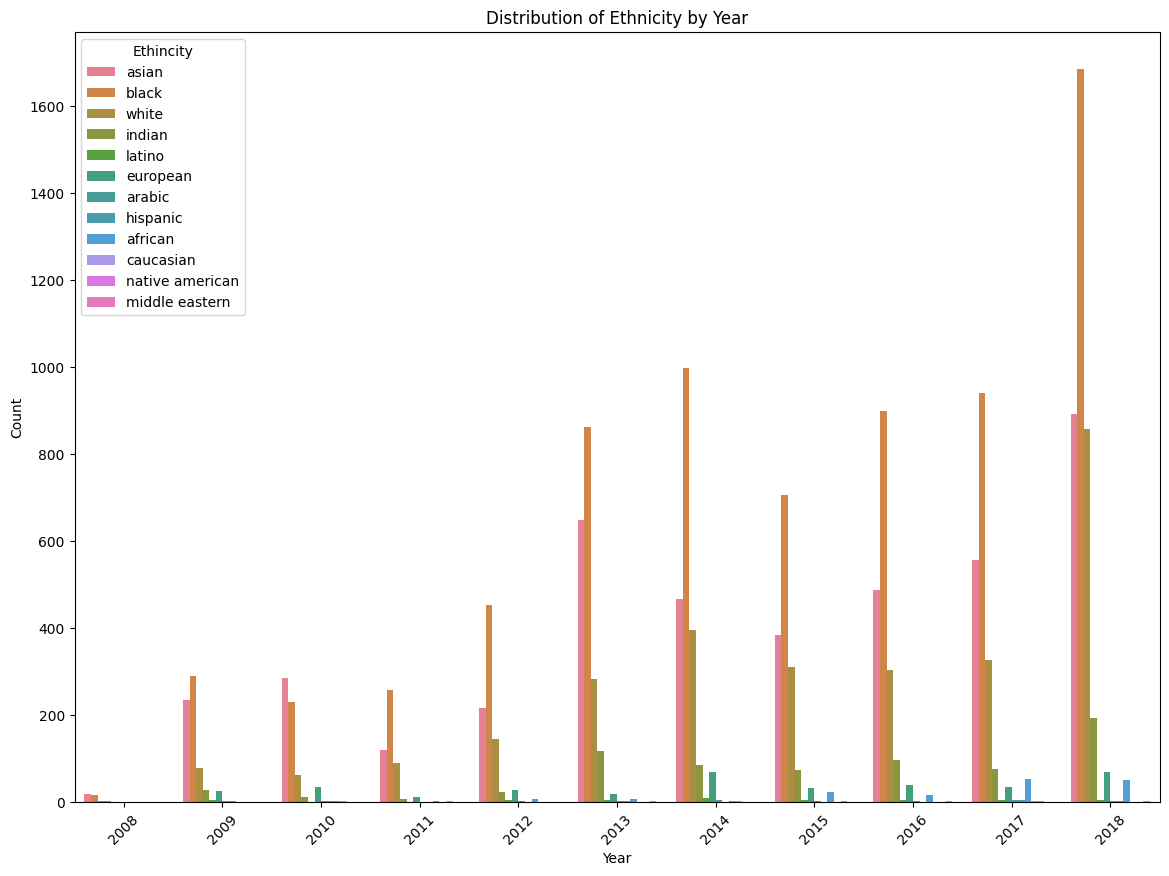

In [126]:

ethnicity_df = df.explode('ethnicity').dropna(subset=['skin_color'])

# Create a bar plot to visualize the skin color distribution by year
plt.figure(figsize=(14, 10))
sns.countplot(data=ethnicity_df, x='year', hue='ethnicity', order=sorted(skin_color_df['year'].unique()))
plt.title('Distribution of Ethnicity by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Ethincity')
plt.show()

In [150]:
# Explode the lists in the 'actors' and 'ethnicity' columns
df['actors'] = df['actors'].dropna().str.split(',')
df = df.explode('actors').explode('ethnicity').dropna(subset=['actors', 'ethnicity'])

# Strip any leading/trailing whitespace from actor names and ethnicity values
df['actors'] = df['actors'].str.strip()
df['ethnicity'] = df['ethnicity'].str.strip()

# Display the DataFrame with 'actors' and 'ethnicity' columns
actors_ethnicity_df = df[['actors', 'ethnicity']]


In [151]:
actors_ethnicity_df

,actors,ethnicity
46,Brandi Mae,black
73,Ayumi Anime,asian
171,Sami Parker,asian
217,Vina Sky,asian
238,Layla Jade,black
...,...,...
217483,Bree Olson,white
217627,Nadia Styles,black
217662,Tricia Oaks,black
217832,Kira Rodriguez,asian
